In [4]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [9]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
all_roots = np.genfromtxt('centroid_size_sim_wing.csv', delimiter=',')#np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')
root = all_roots[0,:] #np.mean(all_roots, axis=0, keepdims=True)


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


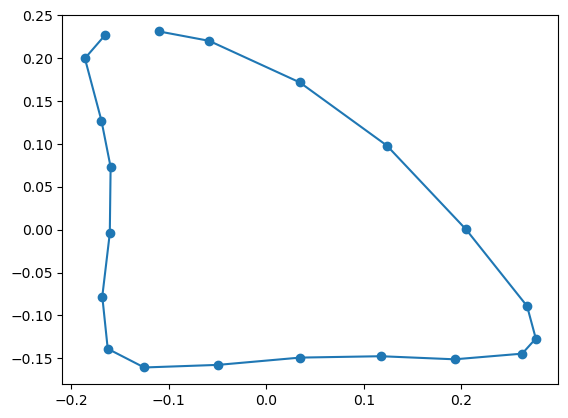

In [10]:
plt.plot(root[0::2], root[1::2], 'o-')

In [3]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [4]:
n_datasets = 20
sigma = 0.7
alpha = 0.025
dt = 0.05
rb = 0

In [5]:
for i in range(n_datasets):
    ds = np.random.randint(0, 2**32)
    outputpath = f'sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
    os.makedirs(outputpath, exist_ok=True)
    print(f'Simulating dataset {i+1} out of {n_datasets} with seed {ds} ')
    simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=rb)
    flat_true_tree = np.array(get_flat_values_sim(simtree)) 
    np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")
    [plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
    plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')  
    plt.close()
    
    leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
    #leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
    leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
    leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
    flat_true_tree_df = pd.DataFrame(flat_true_tree)
    flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False) 

Simulating dataset 1 out of 20 with seed 2629769567 
Simulating dataset 2 out of 20 with seed 3575547206 
Simulating dataset 3 out of 20 with seed 147821375 
Simulating dataset 4 out of 20 with seed 299273977 
Simulating dataset 5 out of 20 with seed 1975314734 
Simulating dataset 6 out of 20 with seed 642782287 
Simulating dataset 7 out of 20 with seed 4264087477 
Simulating dataset 8 out of 20 with seed 2831223094 
Simulating dataset 9 out of 20 with seed 3740141503 
Simulating dataset 10 out of 20 with seed 3569409550 
Simulating dataset 11 out of 20 with seed 1037266971 
Simulating dataset 12 out of 20 with seed 4109713066 
Simulating dataset 13 out of 20 with seed 3389285105 
Simulating dataset 14 out of 20 with seed 4207571180 
Simulating dataset 15 out of 20 with seed 1810758675 
Simulating dataset 16 out of 20 with seed 2942243695 
Simulating dataset 17 out of 20 with seed 2857679128 
Simulating dataset 18 out of 20 with seed 1465299939 
Simulating dataset 19 out of 20 with see